In [1]:
# load libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor , KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor , DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn import metrics
from sklearn.feature_selection import RFE,SelectKBest,f_regression
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read Dataset
kc_data = pd.read_csv('kc_house_data.csv')

In [3]:
kc_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Preprocessing

In [4]:
#Change the date format to just the year
kc_data['date'] = kc_data['date'].str.slice(0,4)

In [10]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [11]:
# The dataset contains No Null Values with 5-float,15-int and 1-Object(string) features.

In [12]:
# Change categorical data to numerical data
kc_data = pd.get_dummies(kc_data,drop_first=True)

In [13]:
kc_data.shape

(21613, 21)

In [14]:
# Price Statistics
kc_data['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

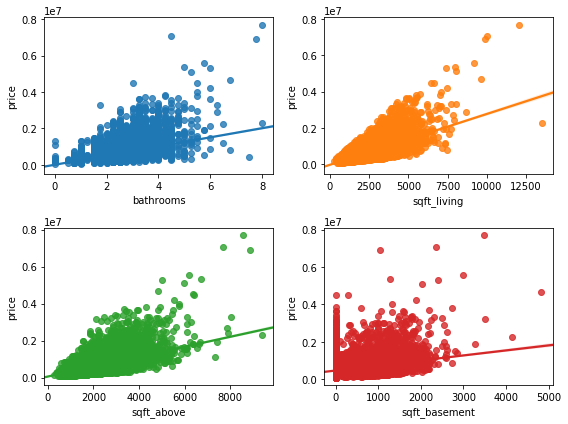

In [15]:
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(8,6))
sns.regplot(kc_data['bathrooms'],kc_data['price'],ax=axs[0,0])
sns.regplot(kc_data['sqft_living'],kc_data['price'],ax=axs[0,1])
sns.regplot(kc_data['sqft_above'],kc_data['price'],ax=axs[1,0])
sns.regplot(kc_data['sqft_basement'],kc_data['price'],ax=axs[1,1])
plt.tight_layout()

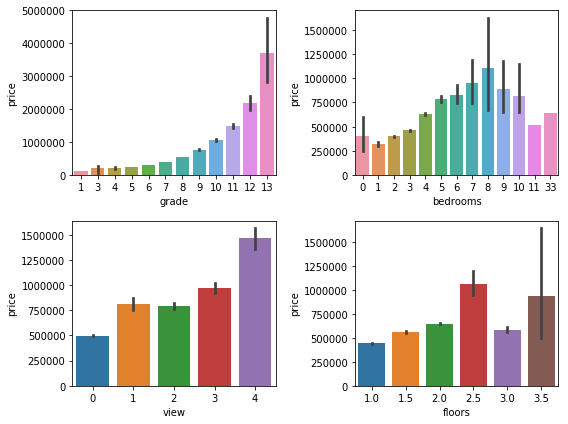

In [16]:
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(8,6))
sns.barplot(kc_data['grade'],kc_data['price'],ax=axs[0,0])
sns.barplot(kc_data['bedrooms'],kc_data['price'],ax=axs[0,1])
sns.barplot(kc_data['view'],kc_data['price'],ax=axs[1,0])
sns.barplot(kc_data['floors'],kc_data['price'],ax=axs[1,1])
plt.tight_layout()

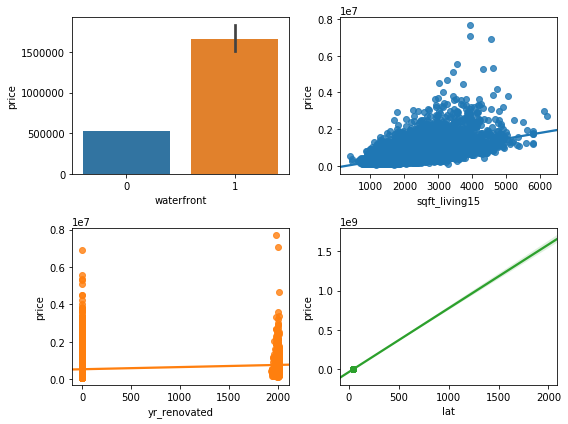

In [17]:
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(8,6))
sns.barplot(kc_data['waterfront'],kc_data['price'],ax=axs[0,0])
sns.regplot(kc_data['sqft_living15'],kc_data['price'],ax=axs[0,1])
sns.regplot(kc_data['yr_renovated'],kc_data['price'],ax=axs[1,0])
sns.regplot(kc_data['lat'],kc_data['price'],ax=axs[1,1])
plt.tight_layout()

#### Removing Outlier

In [18]:
kc_data[kc_data['bedrooms']==33]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_2015
15870,2402100895,640000.0,33,1.75,1620,6000,1.0,0,0,5,...,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,0


In [19]:
kc_data.drop(15870,inplace=True)

In [20]:
kc_features_data =  kc_data.iloc[:,2::]

### Using Select K Best

In [21]:
selector = SelectKBest(f_regression,k='all').fit(kc_features_data,kc_data['price'])
print('----------------------Feature Scores-------------------------')
print(selector.scores_)
print("-----------------Feature Scores' P-values--------------------")
print(selector.pvalues_)

----------------------Feature Scores-------------------------
[2.38792459e+03 8.22897741e+03 2.10023042e+04 1.75144105e+02
 1.52585113e+03 1.65040802e+03 4.05040206e+03 2.85696576e+01
 1.73610520e+04 1.25150392e+04 2.53131111e+03 6.32524672e+01
 3.51075477e+02 6.13561555e+01 2.24862897e+03 1.01217607e+01
 1.12668362e+04 1.47914597e+02 2.77706642e-01]
-----------------Feature Scores' P-values--------------------
[0.00000000e+000 0.00000000e+000 0.00000000e+000 7.95753908e-040
 1.48219694e-322 0.00000000e+000 0.00000000e+000 9.13037752e-008
 0.00000000e+000 0.00000000e+000 0.00000000e+000 1.90713406e-015
 1.02109197e-077 4.98161365e-015 0.00000000e+000 1.46736107e-003
 0.00000000e+000 6.39294519e-034 5.98213729e-001]


In [22]:
feature_scores = list(selector.scores_)

In [23]:
# features with corresponding scores
feature_names = list(kc_features_data.columns.values)
feature_score_dict = dict(zip(feature_names,feature_scores))
feature_score_dict

{'bedrooms': 2387.924592033383,
 'bathrooms': 8228.977408041797,
 'sqft_living': 21002.304161979184,
 'sqft_lot': 175.1441051458112,
 'floors': 1525.8511320891878,
 'waterfront': 1650.4080187000768,
 'view': 4050.402063130261,
 'condition': 28.569657602904897,
 'grade': 17361.05198133765,
 'sqft_above': 12515.039203719869,
 'sqft_basement': 2531.311105277884,
 'yr_built': 63.2524672289707,
 'yr_renovated': 351.0754774238383,
 'zipcode': 61.35615545226101,
 'lat': 2248.6289720518616,
 'long': 10.121760712055881,
 'sqft_living15': 11266.836175928784,
 'sqft_lot15': 147.91459734591237,
 'date_2015': 0.2777066420384256}

In [24]:
# Using Standard Scaler
scaler = StandardScaler()

#### Train, Test and Validation sets

In [25]:
# Train and Test Set
x_train,x_test,y_train,y_test = train_test_split(kc_features_data,kc_data['price'],test_size=0.3, random_state = 0)

In [26]:
# Training Set variables for fianl Test Dataset
X_train = x_train
Y_train = y_train

In [27]:
# Train and Validataion Set
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.25,random_state=0)

### Scaling Data

In [28]:
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_val = scaler.transform(x_val)

# Regression

#### Lasso Regression on validation set using all features

In [29]:
model = Lasso(random_state=0).fit(X=scaled_x_train,y =y_train)
model.coef_

array([-31289.54632804,  31697.79323667, 253778.55641706,   9682.27070882,
         4232.61220164,  41123.50953083,  44296.51779865,  17825.19290496,
       118918.07953281, -87516.81627851, -61585.81718966, -76449.1733656 ,
         6657.76210594, -31293.88296766,  86290.4750918 , -31031.26442046,
        14485.17047851, -13478.92660311,  15842.13590976])

In [30]:
r_squared = model.score(X=scaled_x_val,y=y_val)
adj_r_squared = 1-(((1-r_squared)*(len(x_val)-1))/(len(x_val)-x_val.shape[1]-1))
print([r_squared,adj_r_squared])

[0.71873083153697, 0.7173102801810962]


#### Decision Tree Regressor on validation set using all features

In [31]:
model = DecisionTreeRegressor(random_state=0).fit(scaled_x_train,y_train)
r_squared = model.score(scaled_x_val,y_val)
adj_r_squared = 1-(((1-r_squared)*(len(x_val)-1))/(len(x_val)-x_val.shape[1]-1))
print([r_squared,adj_r_squared])

[0.7680675595507248, 0.7668961835888598]


#### KNN Regressor on validation set using all features

In [32]:
model = KNeighborsRegressor(n_neighbors=5).fit(X=scaled_x_train,y =y_train)
r_squared = model.score(scaled_x_val,y_val)
adj_r_squared = 1-(((1-r_squared)*(len(x_val)-1))/(len(x_val)-x_val.shape[1]-1))
print([r_squared,adj_r_squared])

[0.7898535226855233, 0.7887921768405007]


#### Multiple Regressor on validation set using all features

In [33]:
model = LinearRegression().fit(scaled_x_train,y_train)
r_squared = model.score(scaled_x_val,y_val)
adj_r_squared = 1-(((1-r_squared)*(len(x_val)-1))/(len(x_val)-x_val.shape[1]-1))
print([r_squared,adj_r_squared])

[0.7187306337255207, 0.717310081370599]


#### Random Forrest Regressor on validation set using all features

In [34]:
model = RandomForestRegressor(random_state=0).fit(scaled_x_train,y_train)
r_squared = model.score(scaled_x_val,y_val)
adj_r_squared = 1-(((1-r_squared)*(len(x_val)-1))/(len(x_val)-x_val.shape[1]-1))
print([r_squared,adj_r_squared])

[0.8745291389960949, 0.8738954477789034]


### Random Forrest Regressor on Test set using all features

In [35]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(x_test)

In [36]:
model = RandomForestRegressor(random_state=0).fit(scaled_X_train,Y_train)
r_squared = model.score(scaled_x_test,y_test)
adj_r_squared = 1-(((1-r_squared)*(len(x_val)-1))/(len(x_val)-x_val.shape[1]-1))
print([r_squared,adj_r_squared])

[0.8622030240618623, 0.8615070797389425]


In [37]:
# List of Important Features
imp_features = ['bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'waterfront',
 'view',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_renovated',
 'lat',
 'sqft_living15']

In [38]:
# Dataset with important features
x_train = x_train[imp_features]
x_val = x_val[imp_features]

In [39]:
# Scaling Important Feature Dataset
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_val = scaler.transform(x_val)

#### Random Forrest Regressor on validation set using Important Features

In [40]:
model = RandomForestRegressor(random_state=0).fit(scaled_x_train,y_train)
r_squared = model.score(scaled_x_val,y_val)
adj_r_squared = 1-(((1-r_squared)*(len(x_val)-1))/(len(x_val)-x_val.shape[1]-1))
print([r_squared,adj_r_squared])

[0.8049827440112232, 0.8043618347324051]


#### Lasso Regression on validation set using Important features

In [41]:
model = Lasso(alpha=1,random_state=0).fit(X=scaled_x_train,y =y_train)
model.coef_

array([-21914.70613053,  -4355.45690883, 253520.54911099, -15349.15768271,
        40586.5265899 ,  53980.20489649, 104162.61211208, -78912.71278557,
       -43902.97171012,  21405.91392043,  93507.11150056,   4579.78013067])

In [42]:
r_squared = model.score(X=scaled_x_val,y=y_val)
adj_r_squared = 1-(((1-r_squared)*(len(x_val)-1))/(len(x_val)-x_val.shape[1]-1))
print([r_squared,adj_r_squared])

[0.683643645713249, 0.6826364087136626]


#### Decision Tree Regressor on validation set using Important features

In [43]:
model = DecisionTreeRegressor(random_state=0).fit(scaled_x_train,y_train)
r_squared = model.score(scaled_x_val,y_val)
adj_r_squared = 1-(((1-r_squared)*(len(x_val)-1))/(len(x_val)-x_val.shape[1]-1))
print([r_squared,adj_r_squared])

[0.6021665304362689, 0.6008998810240204]


#### KNN Regressor on validation set using Important features

In [44]:
model = KNeighborsRegressor(n_neighbors=5).fit(X=scaled_x_train,y =y_train)
r_squared = model.score(scaled_x_val,y_val)
adj_r_squared = 1-(((1-r_squared)*(len(x_val)-1))/(len(x_val)-x_val.shape[1]-1))
print([r_squared,adj_r_squared])

[0.7648410447043974, 0.7640923295376298]


#### Multiple Regressor on validation set using Important features

In [45]:
model = LinearRegression().fit(scaled_x_train,y_train)
r_squared = model.score(scaled_x_val,y_val)
adj_r_squared = 1-(((1-r_squared)*(len(x_val)-1))/(len(x_val)-x_val.shape[1]-1))
print([r_squared,adj_r_squared])

[0.6836439383426598, 0.682636702274767]


In [46]:
# Final Train and Test dataset with Important Features
X_train = X_train[imp_features]
x_test = x_test[imp_features]
scaled_X_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(x_test)

### Random Forrest Regressor on Test set with Important Features

In [47]:
model = RandomForestRegressor(random_state=0).fit(scaled_X_train,Y_train)
r_squared = model.score(scaled_x_test,y_test)
adj_r_squared = 1-(((1-r_squared)*(len(x_test)-1))/(len(x_test)-x_test.shape[1]-1))
print([r_squared,adj_r_squared])

[0.7820402618949703, 0.7816360713746087]


In [48]:
model = KNeighborsRegressor(n_neighbors=5).fit(X=scaled_X_train,y =Y_train)
r_squared = model.score(scaled_x_test,y_test)
adj_r_squared = 1-(((1-r_squared)*(len(x_val)-1))/(len(x_val)-x_val.shape[1]-1))
print([r_squared,adj_r_squared])

[0.7398236661213362, 0.7389952989134445]


# Clustering

### (Clustering House Prices based on price)

#### K-Means CLustering

In [44]:
scaled_x_train = scaler.fit_transform(kc_data[imp_features])

In [45]:
clustering = KMeans(n_clusters=6 ,init='random',random_state=0).fit(scaled_x_train)
clusters = clustering.labels_

In [46]:
kc_data['k-means_cluster_labels'] = clusters

#### Ward's Linkage

In [47]:
clustering = AgglomerativeClustering(n_clusters=6,linkage='ward').fit(scaled_x_train)

In [48]:
clusters = clustering.labels_

In [49]:
kc_data['ward_cluster_labels'] = clusters

# Price Map

In [50]:
map_data = kc_data[['lat','long','price','k-means_cluster_labels','ward_cluster_labels']]

In [51]:
map_data.head()

,lat,long,price,k-means_cluster_labels,ward_cluster_labels
0,47.5112,-122.257,221900.0,1,4
1,47.7210,-122.319,538000.0,2,3
2,47.7379,-122.233,180000.0,1,4
3,47.5208,-122.393,604000.0,5,0
4,47.6168,-122.045,510000.0,1,4


### Custom Price Range Clustering Map

In [52]:
# Give colors to different price ranges
map_data['color_price'] = '#de2d26' # Default Color Initialization
map_data['color_price'][map_data['price']>5000000] = '#de2d26' # dark red
map_data['color_price'][(map_data['price']>=3000000) & (map_data['price']<5000000)] = '#f03b20' #light red
map_data['color_price'][(map_data['price']>=1000000) & (map_data['price']<3000000)] = '#feb24c' #Yellow
map_data['color_price'][(map_data['price']>=500000) & (map_data['price']<1000000)] = '#31a354' # Green
map_data['color_price'][(map_data['price']>=250000) & (map_data['price']<500000)] = '#2b8cbe' # Blue
map_data['color_price'][(map_data['price']<250000)] = '#7fcdbb'    # light blue

In [53]:
map_data.sort_values(by= 'price',ascending=False,inplace=True)

In [54]:
import plotly.plotly as py
import plotly
from plotly.graph_objs import *
py.sign_in(username='adarshjv20', api_key='VhR37dcVwvfCYHbv3qO0')
trace_1 = {
    "hoverinfo" : "skip",
    "lat" : list(map_data['lat']),
    "lon" : list(map_data['long']),
    "marker": {
        "color": list(map_data['color_price']),
        "opacity": 1, 
        "size": 4
    },
    "mode": "markers", 
    "showlegend": False, 
    "type": "scattermapbox" 
}
data = Data([trace_1])
layout = {
  "autosize": True, 
  "hovermode": "closest", 
  "mapbox": {
    "bearing": 0, 
    "center": {
      "lat": 47.6, 
      "lon": -122.2
    }, 
    "pitch": 0, 
    "style":'light',
    "zoom": 9
  }, 
  "title": "House prices in King County (Custom Price Clustering)"
}
fig = Figure(data=data, layout=layout)
py.iplot(fig)

C:\Users\ADU\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




### K-Means Cluster Map for Different Prices

In [55]:
map_data['color_cluster'] = '#de2d26' # Default Color Initialization
map_data['color_cluster'][map_data['k-means_cluster_labels']==0] = '#de2d26' # dark red
map_data['color_cluster'][map_data['k-means_cluster_labels']==1] = '#2b8cbe' # dark Blue
map_data['color_cluster'][map_data['k-means_cluster_labels']==2] = '#feb24c' #Yellow
map_data['color_cluster'][map_data['k-means_cluster_labels']==3] = '#7fcdbb' # light blue
map_data['color_cluster'][map_data['k-means_cluster_labels']==4] = '#f03b20' #light red
map_data['color_cluster'][map_data['k-means_cluster_labels']==5] = '#31a354' # Green

In [56]:
import plotly.plotly as py
import plotly
from plotly.graph_objs import *
py.sign_in(username='adarshjv20', api_key='VhR37dcVwvfCYHbv3qO0')
trace_1 = {
    "hoverinfo" : "skip",
    "lat" : list(map_data['lat']),
    "lon" : list(map_data['long']),
    "marker": {
        "color": list(map_data['color_cluster']),
        "opacity": 1, 
        "size": 4
    },
    "mode": "markers", 
    "showlegend": False, 
    "type": "scattermapbox" 
}
data = Data([trace_1])
layout = {
  "autosize": True, 
  "hovermode": "closest", 
  "mapbox": {
    "bearing": 0, 
    "center": {
      "lat": 47.6, 
      "lon": -122.2
    }, 
    "pitch": 0, 
    "style":'light',
    "zoom": 9
  }, 
  "title": "House prices in King County (K-Means) Clustering"
}
fig = Figure(data=data, layout=layout)
py.iplot(fig)

C:\Users\ADU\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




In [57]:
map_data['ward_color_cluster'] = '#de2d26' # Default Color Initialization
map_data['ward_color_cluster'][map_data['ward_cluster_labels']==0] = '#31a354' # Green 
map_data['ward_color_cluster'][map_data['ward_cluster_labels']==1] = '#feb24c' #Yellow
map_data['ward_color_cluster'][map_data['ward_cluster_labels']==2] = '#de2d26' # dark red 
map_data['ward_color_cluster'][map_data['ward_cluster_labels']==3] = '#7fcdbb' # light blue
map_data['ward_color_cluster'][map_data['ward_cluster_labels']==4] = '#2b8cbe' #  dark Blue
map_data['ward_color_cluster'][map_data['ward_cluster_labels']==5] =  '#f03b20' #light red

In [58]:
import plotly.plotly as py
import plotly
from plotly.graph_objs import *
py.sign_in(username='adarshjv20', api_key='VhR37dcVwvfCYHbv3qO0')
trace_1 = {
    "hoverinfo" : "skip",
    "lat" : list(map_data['lat']),
    "lon" : list(map_data['long']),
    "marker": {
        "color": list(map_data['ward_color_cluster']),
        "opacity": 1, 
        "size": 4
    },
    "mode": "markers", 
    "showlegend": False, 
    "type": "scattermapbox" 
}
data = Data([trace_1])
layout = {
  "autosize": True, 
  "hovermode": "closest", 
  "mapbox": {
    "bearing": 0, 
    "center": {
      "lat": 47.6, 
      "lon": -122.2
    }, 
    "pitch": 0, 
    "style":'light',
    "zoom": 9
  }, 
  "title": "House prices in King County (Ward's Linkage) Clsutering"
}
fig = Figure(data=data, layout=layout)
py.iplot(fig)

C:\Users\ADU\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




In [49]:
x_train,x_test,y_train,y_test = train_test_split(kc_data.drop(columns = ['grade']),kc_data['grade'],test_size=0.25, random_state = 0)

In [50]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

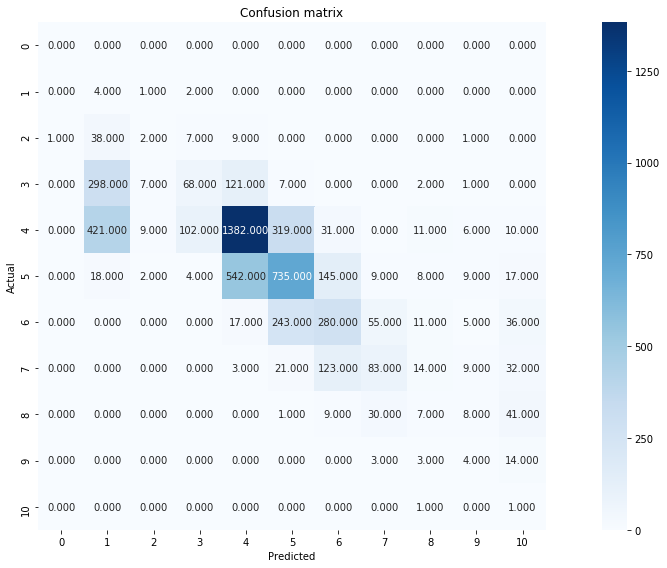

In [51]:
classifier = GaussianNB()
classifier.fit(x_train_scaled, y_train)
y_pred = classifier.predict(x_test_scaled)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(16,8))
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [52]:
accuracy = metrics.accuracy_score(y_test, y_pred)
error = 1 - metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average = None)
recall = metrics.recall_score(y_test, y_pred, average = None)
F1_score = metrics.f1_score(y_test, y_pred, average = None)
print(accuracy)
print(precision.mean())
print(recall.mean())
print(F1_score.mean())

0.4749213399962984
0.25930507538604536
0.30011453575394015
0.22260028604919116


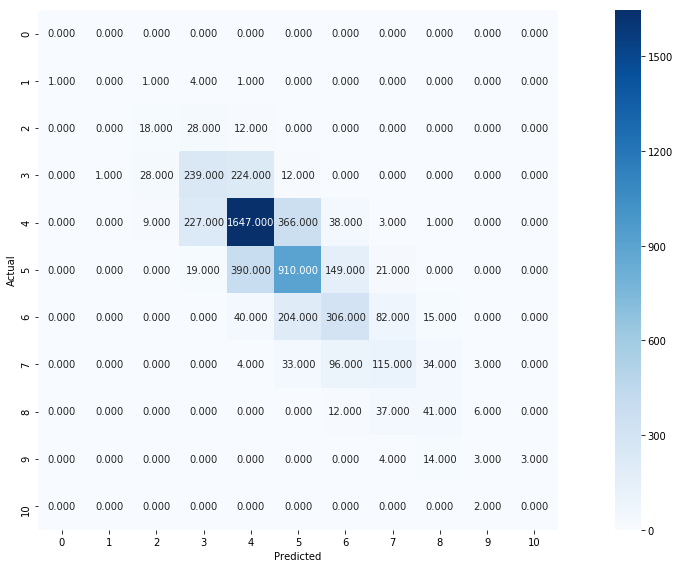

In [53]:
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x_train_scaled,y_train)
plt.figure(figsize=(16,8))
y_pred = classifier.predict(x_test_scaled)
conf_matrix = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt='.3f',square=True,cmap=plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()

In [54]:
accuracy = metrics.accuracy_score(y_test, y_pred)
error = 1 - metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average = None)
recall = metrics.recall_score(y_test, y_pred, average = None)
F1_score = metrics.f1_score(y_test, y_pred, average = None)
print(accuracy)
print(precision.mean())
print(recall.mean())
print(F1_score.mean())

0.6068850638534148
0.3312548376297617
0.3221039849106972
0.32538274234629866


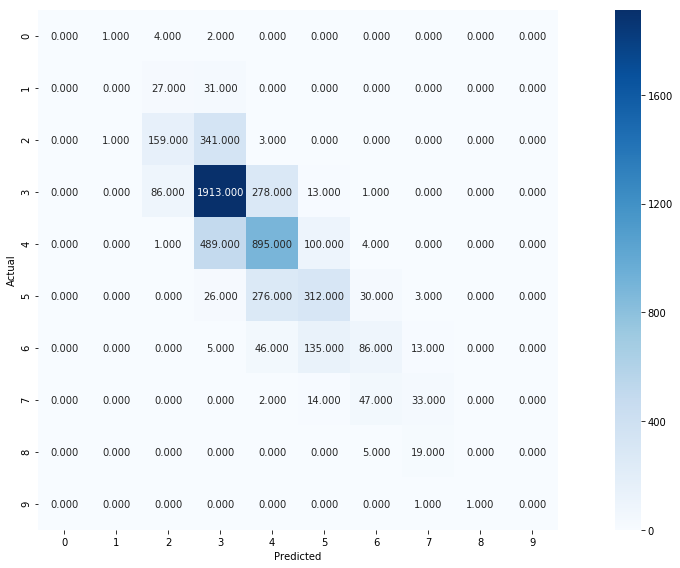

In [55]:
classifier = KNeighborsClassifier(n_neighbors = 20)
classifier.fit(x_train_scaled,y_train)
plt.figure(figsize=(16,8))
y_pred = classifier.predict(x_test_scaled)
conf_matrix = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt='.3f',square=True,cmap=plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()

In [56]:
accuracy = metrics.accuracy_score(y_test, y_pred)
error = 1 - metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average = None)
recall = metrics.recall_score(y_test, y_pred, average = None)
F1_score = metrics.f1_score(y_test, y_pred, average = None)
print(accuracy)
print(precision.mean())
print(recall.mean())
print(F1_score.mean())

0.628909864889876
0.3371109099447411
0.2879287327353854
0.3043125541284736


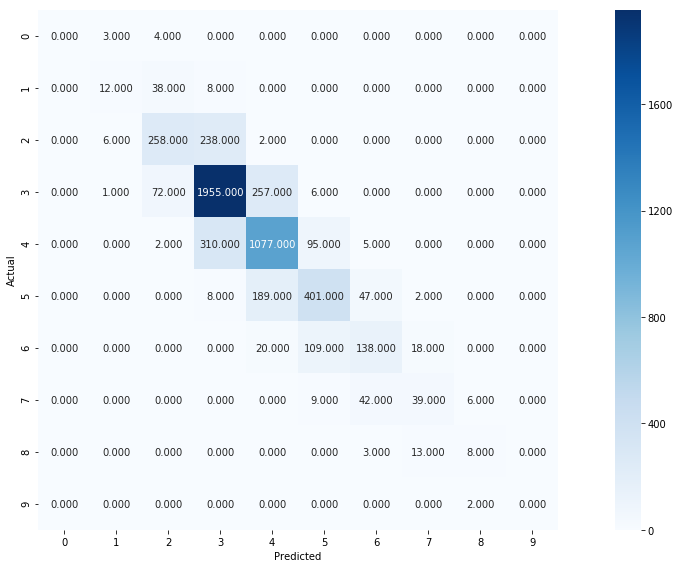

In [57]:
classifier = RandomForestClassifier(n_estimators=100, max_depth=100, random_state=0)
classifier.fit(x_train_scaled,y_train)
plt.figure(figsize=(16,8))
y_pred = classifier.predict(x_test_scaled)
conf_matrix = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt='.3f',square=True,cmap=plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()

In [58]:
accuracy = metrics.accuracy_score(y_test, y_pred)
error = 1 - metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average = None)
recall = metrics.recall_score(y_test, y_pred, average = None)
F1_score = metrics.f1_score(y_test, y_pred, average = None)
print(accuracy)
print(precision.mean())
print(recall.mean())
print(F1_score.mean())

0.719600222098834
0.49841580266860924
0.41390221742061906
0.44385892489429707


In [69]:
kc_data[kc_data['grade']==5]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_2015
36,9435300030,550000.0,4,1.00,1660,34848,1.0,0,0,1,...,930,730,1933,0,98052,47.6621,-122.132,2160,11467,0
166,2009000370,269950.0,2,1.75,1340,7250,1.0,0,0,5,...,700,640,1949,0,98198,47.4080,-122.327,1830,9750,1
263,1400300055,425000.0,2,1.00,770,5040,1.0,0,0,3,...,770,0,1930,0,98144,47.5964,-122.299,1330,2580,1
264,2123039032,369900.0,1,0.75,760,10079,1.0,1,4,5,...,760,0,1936,0,98070,47.4683,-122.438,1230,14267,0
411,2422029094,517534.0,2,1.00,833,143947,1.0,0,0,3,...,833,0,2006,0,98070,47.3889,-122.482,1380,143947,0
478,66000070,315000.0,2,1.00,630,6550,1.0,0,0,3,...,630,0,1918,0,98126,47.5486,-122.380,1420,6550,1
523,3340401555,235000.0,4,1.50,1690,11054,1.0,0,0,4,...,1690,0,1930,0,98055,47.4667,-122.215,1690,9040,0
700,9349900105,795000.0,2,1.00,1380,5000,1.5,0,2,3,...,1380,0,1905,0,98106,47.5708,-122.359,1500,5000,1
704,41000454,130000.0,2,1.00,880,9000,1.0,0,0,3,...,880,0,1928,0,98188,47.4672,-122.291,1410,10000,0
820,3121059033,325000.0,3,1.00,1490,57381,1.5,0,0,4,...,1490,0,1932,0,98092,47.2597,-122.228,1580,101529,0
